In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

plt.rcParams['font.family'] = 'AppleGothic'
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv('pima-indians-diabetes.csv', names=['임신횟수', '포도당농도', '혈압', '피부주름두께', '인슐린', '체질량', '혈통', '나이', '결과'])
df

,임신횟수,포도당농도,혈압,피부주름두께,인슐린,체질량,혈통,나이,결과
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.tail()

,임신횟수,포도당농도,혈압,피부주름두께,인슐린,체질량,혈통,나이,결과
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   임신횟수    768 non-null    int64  
 1   포도당농도   768 non-null    int64  
 2   혈압      768 non-null    int64  
 3   피부주름두께  768 non-null    int64  
 4   인슐린     768 non-null    int64  
 5   체질량     768 non-null    float64
 6   혈통      768 non-null    float64
 7   나이      768 non-null    int64  
 8   결과      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: ylabel='Frequency'>

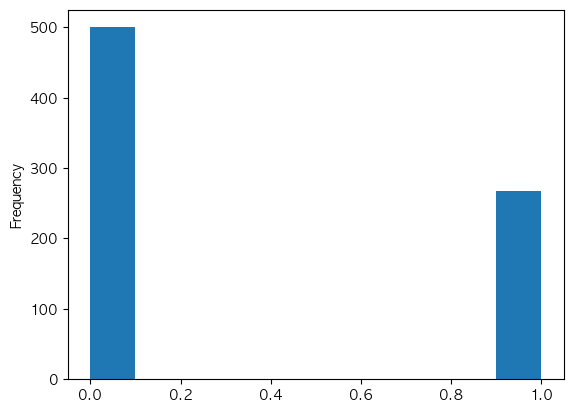

In [5]:
df['결과'].plot.hist()

In [6]:
np.sum(df.결과==1)

268

In [7]:
np.sum(df.결과==0)

500

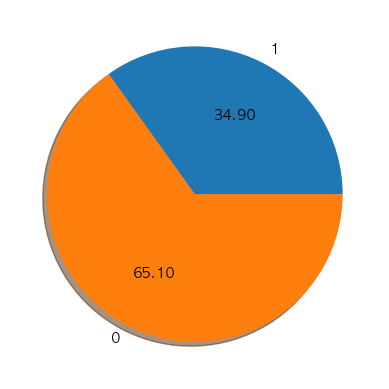

In [8]:
plt.pie([np.sum(df.결과==1), np.sum(df.결과==0)], labels=[1, 0], autopct='%.2f', shadow=True);

In [9]:
df.corr()

,임신횟수,포도당농도,혈압,피부주름두께,인슐린,체질량,혈통,나이,결과
임신횟수,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
포도당농도,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
혈압,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
피부주름두께,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
인슐린,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
체질량,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
혈통,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
나이,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
결과,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

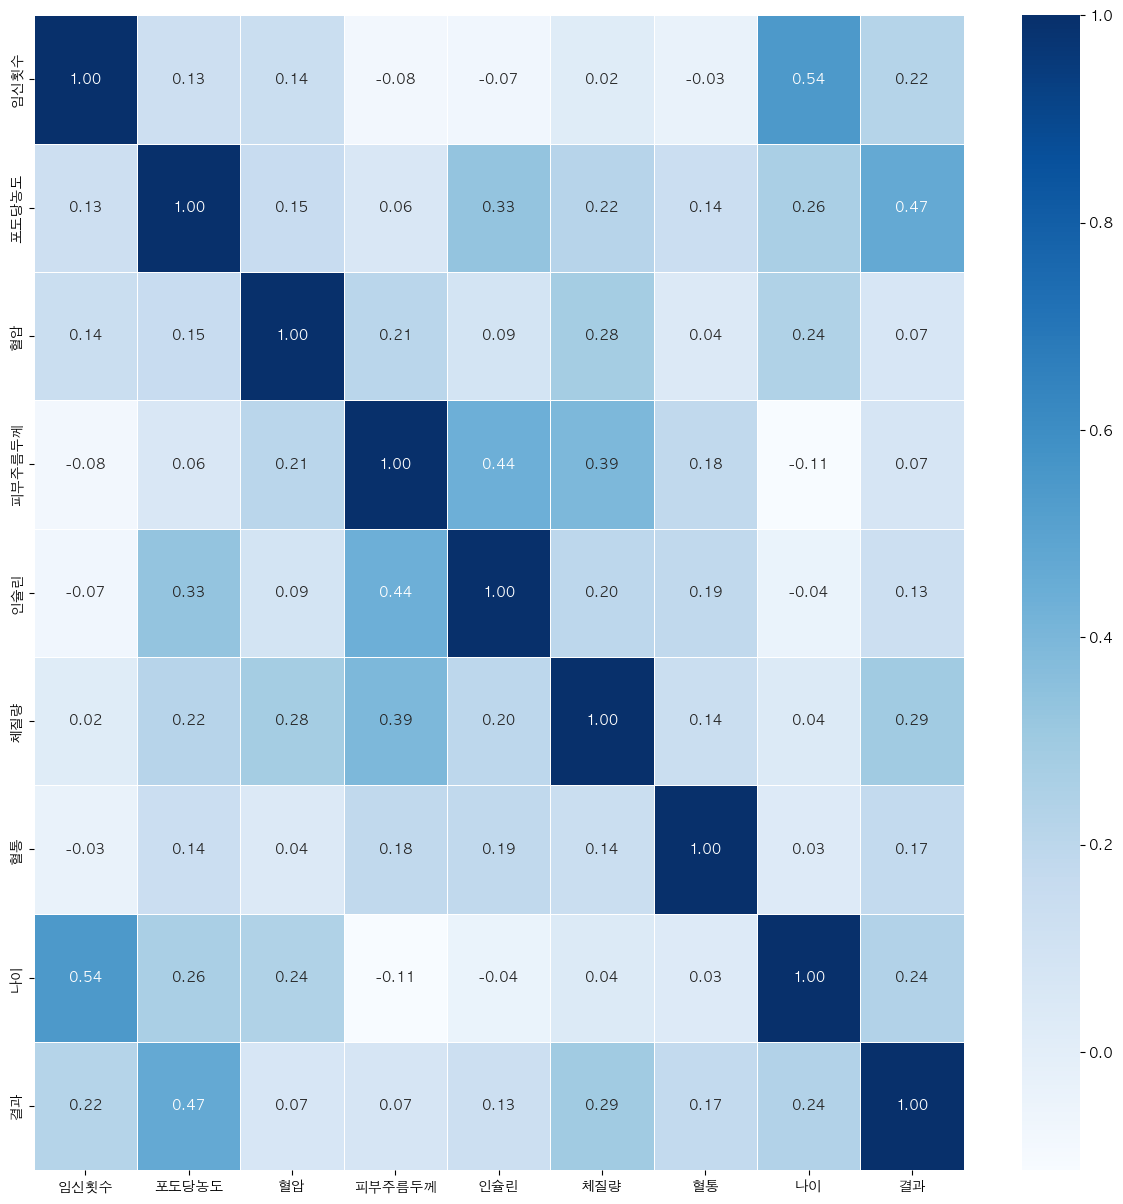

In [10]:
import seaborn as sns


plt.figure(figsize=(15,15))
sns.heatmap(data=df.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')

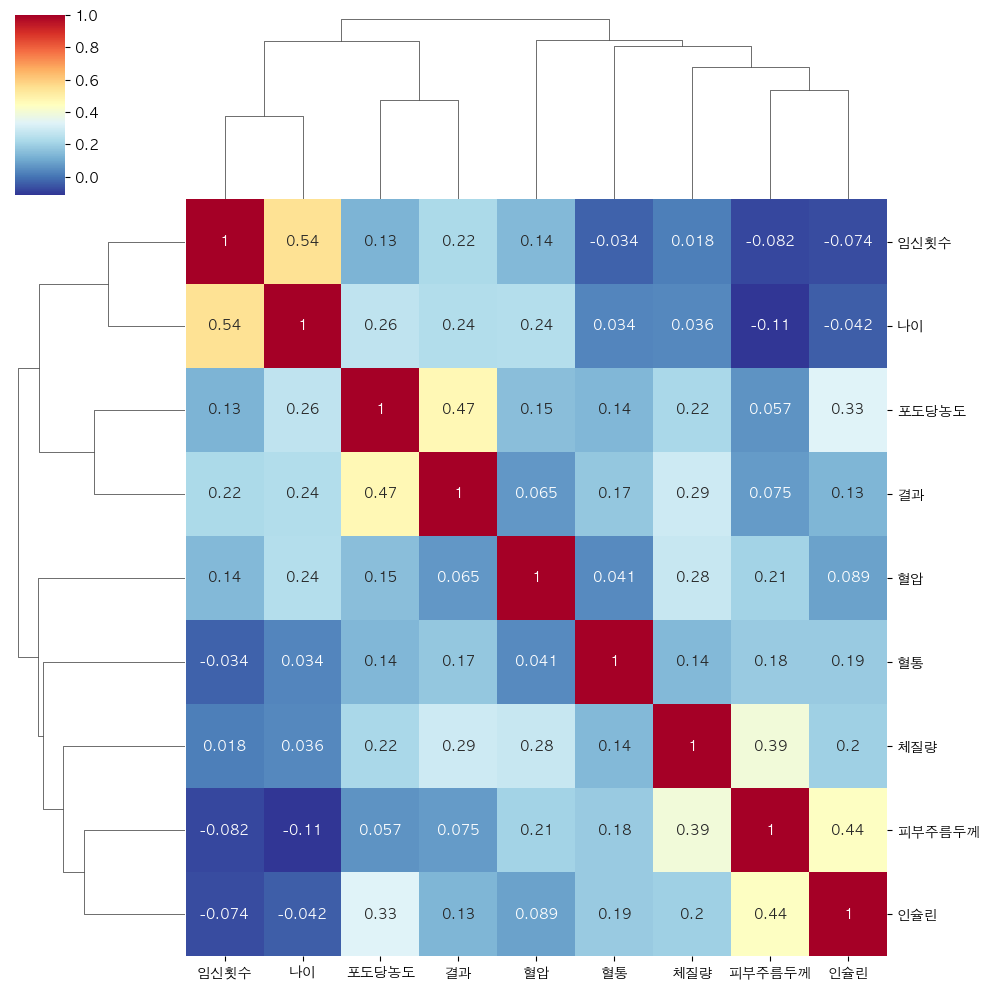

In [11]:
sns.clustermap(df.corr(), annot=True, cmap='RdYlBu_r')

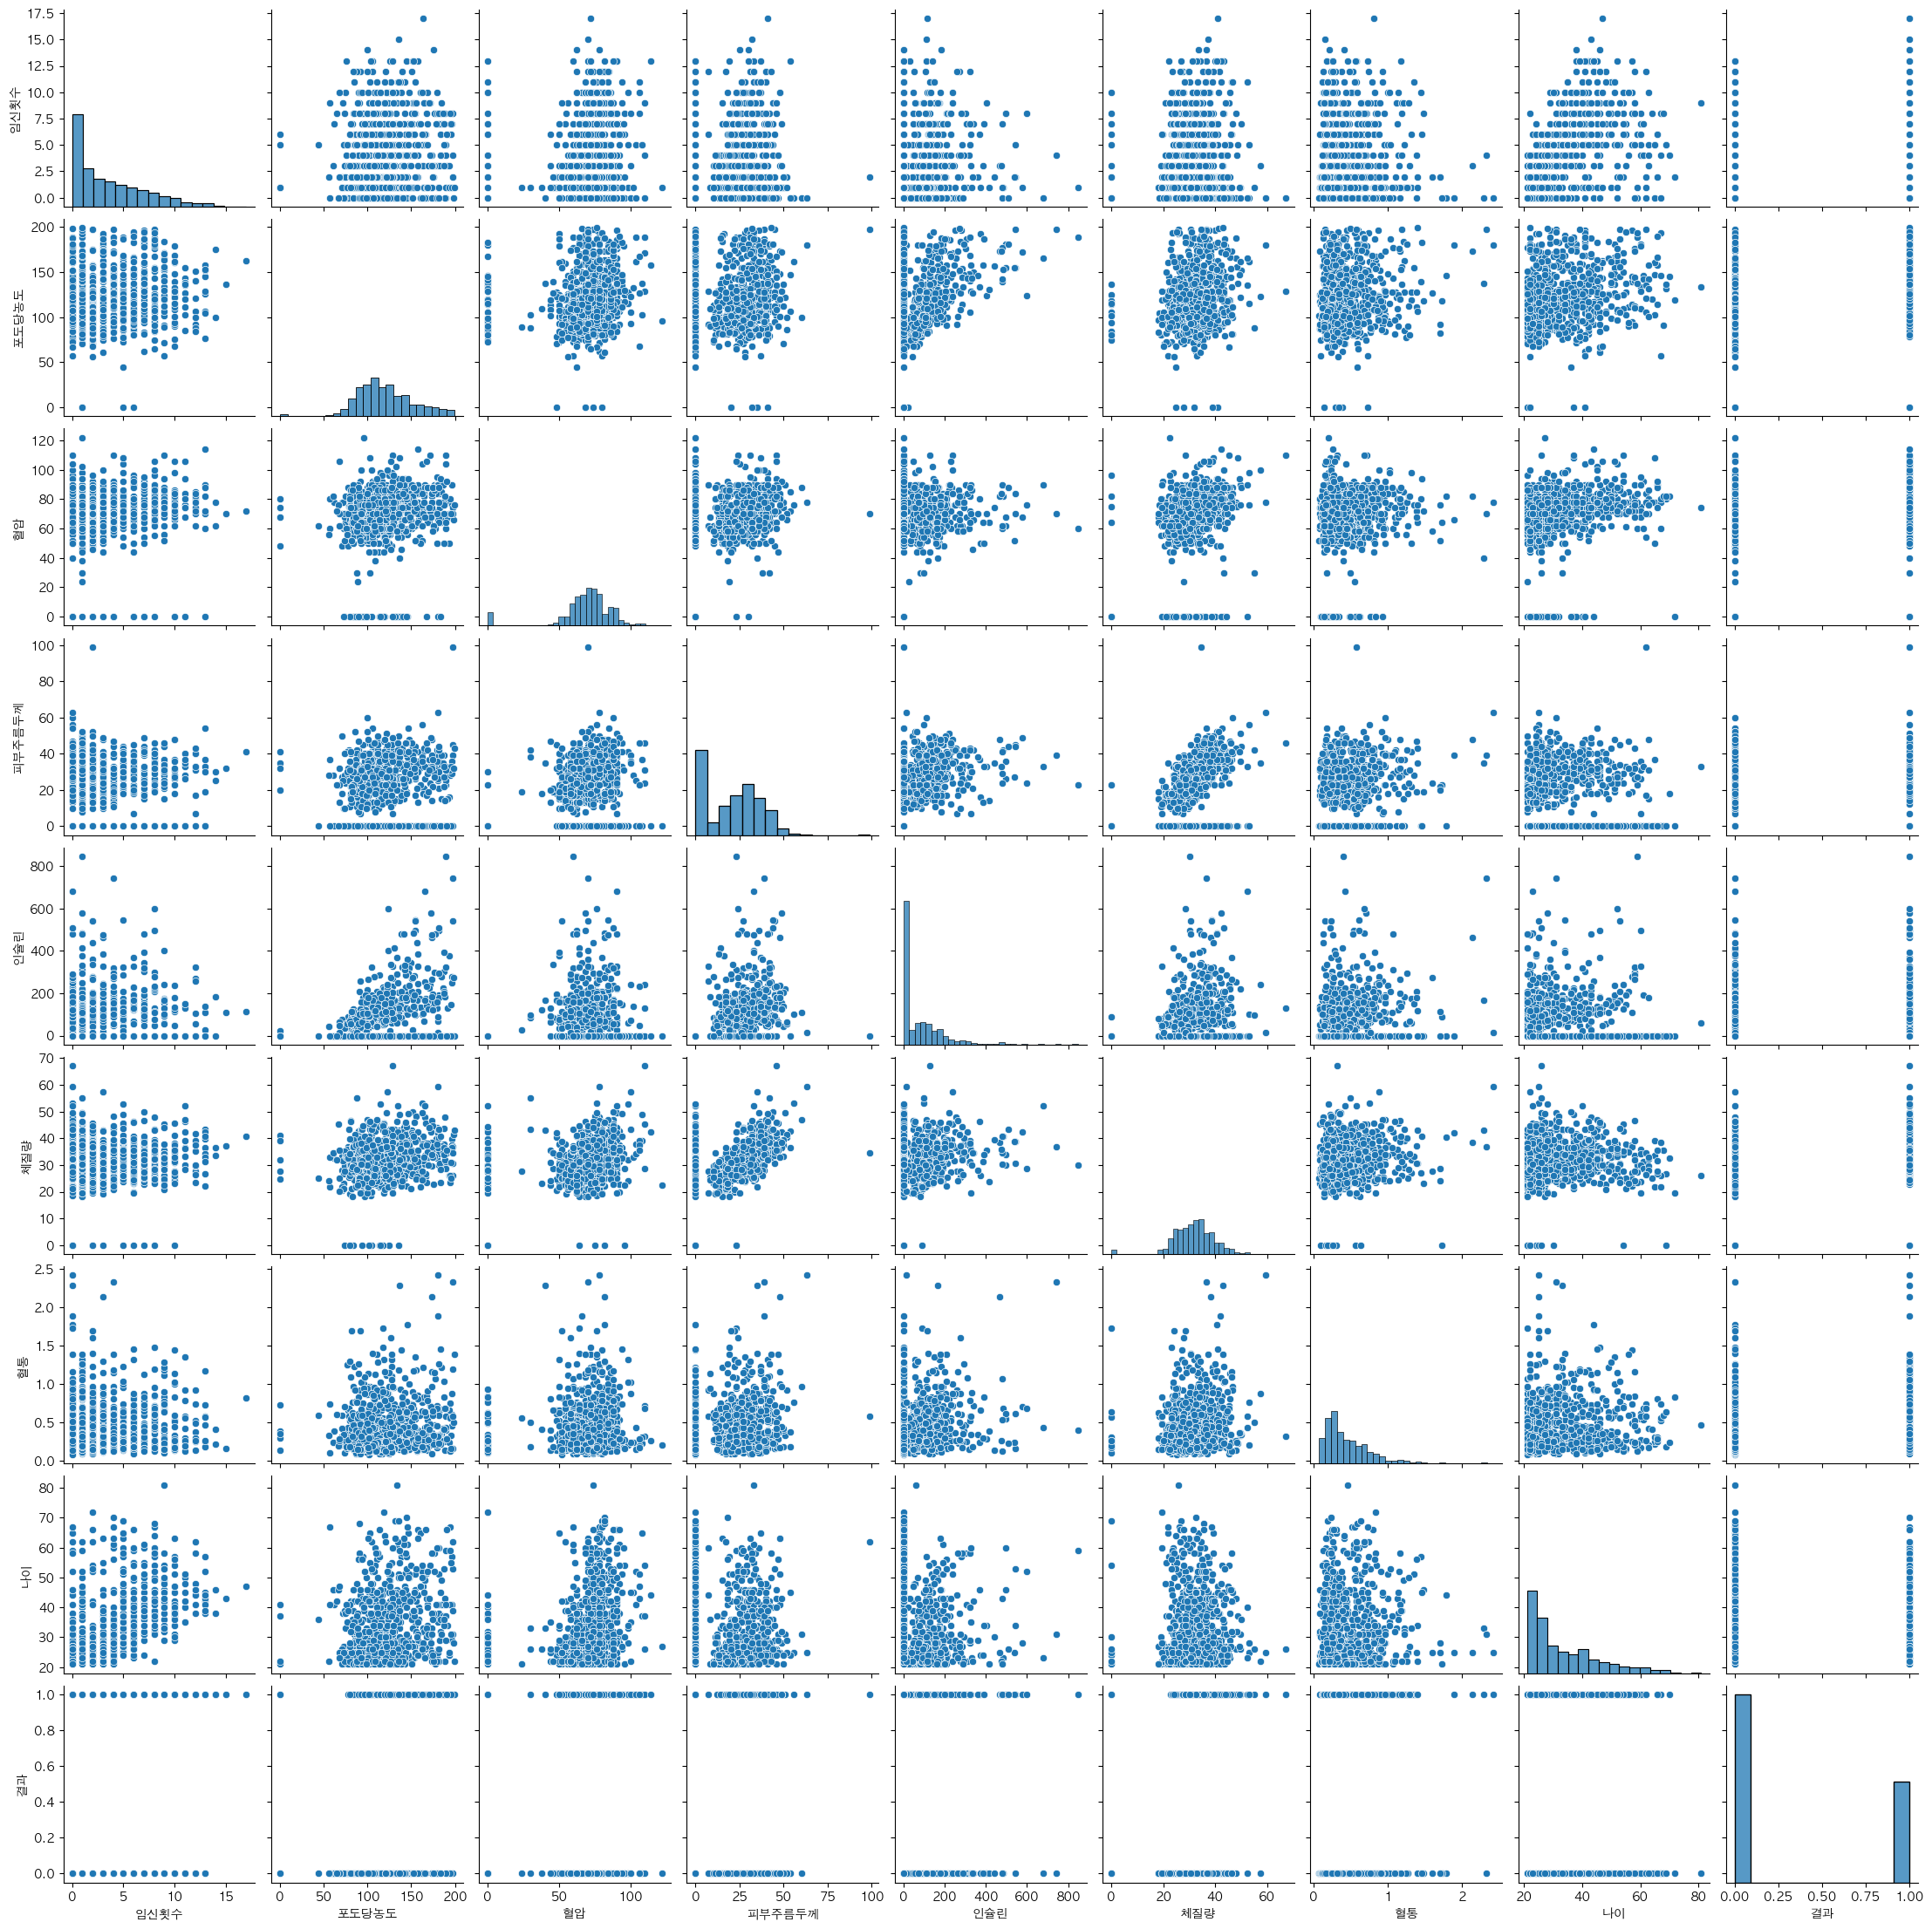

In [12]:
sns.pairplot(df)

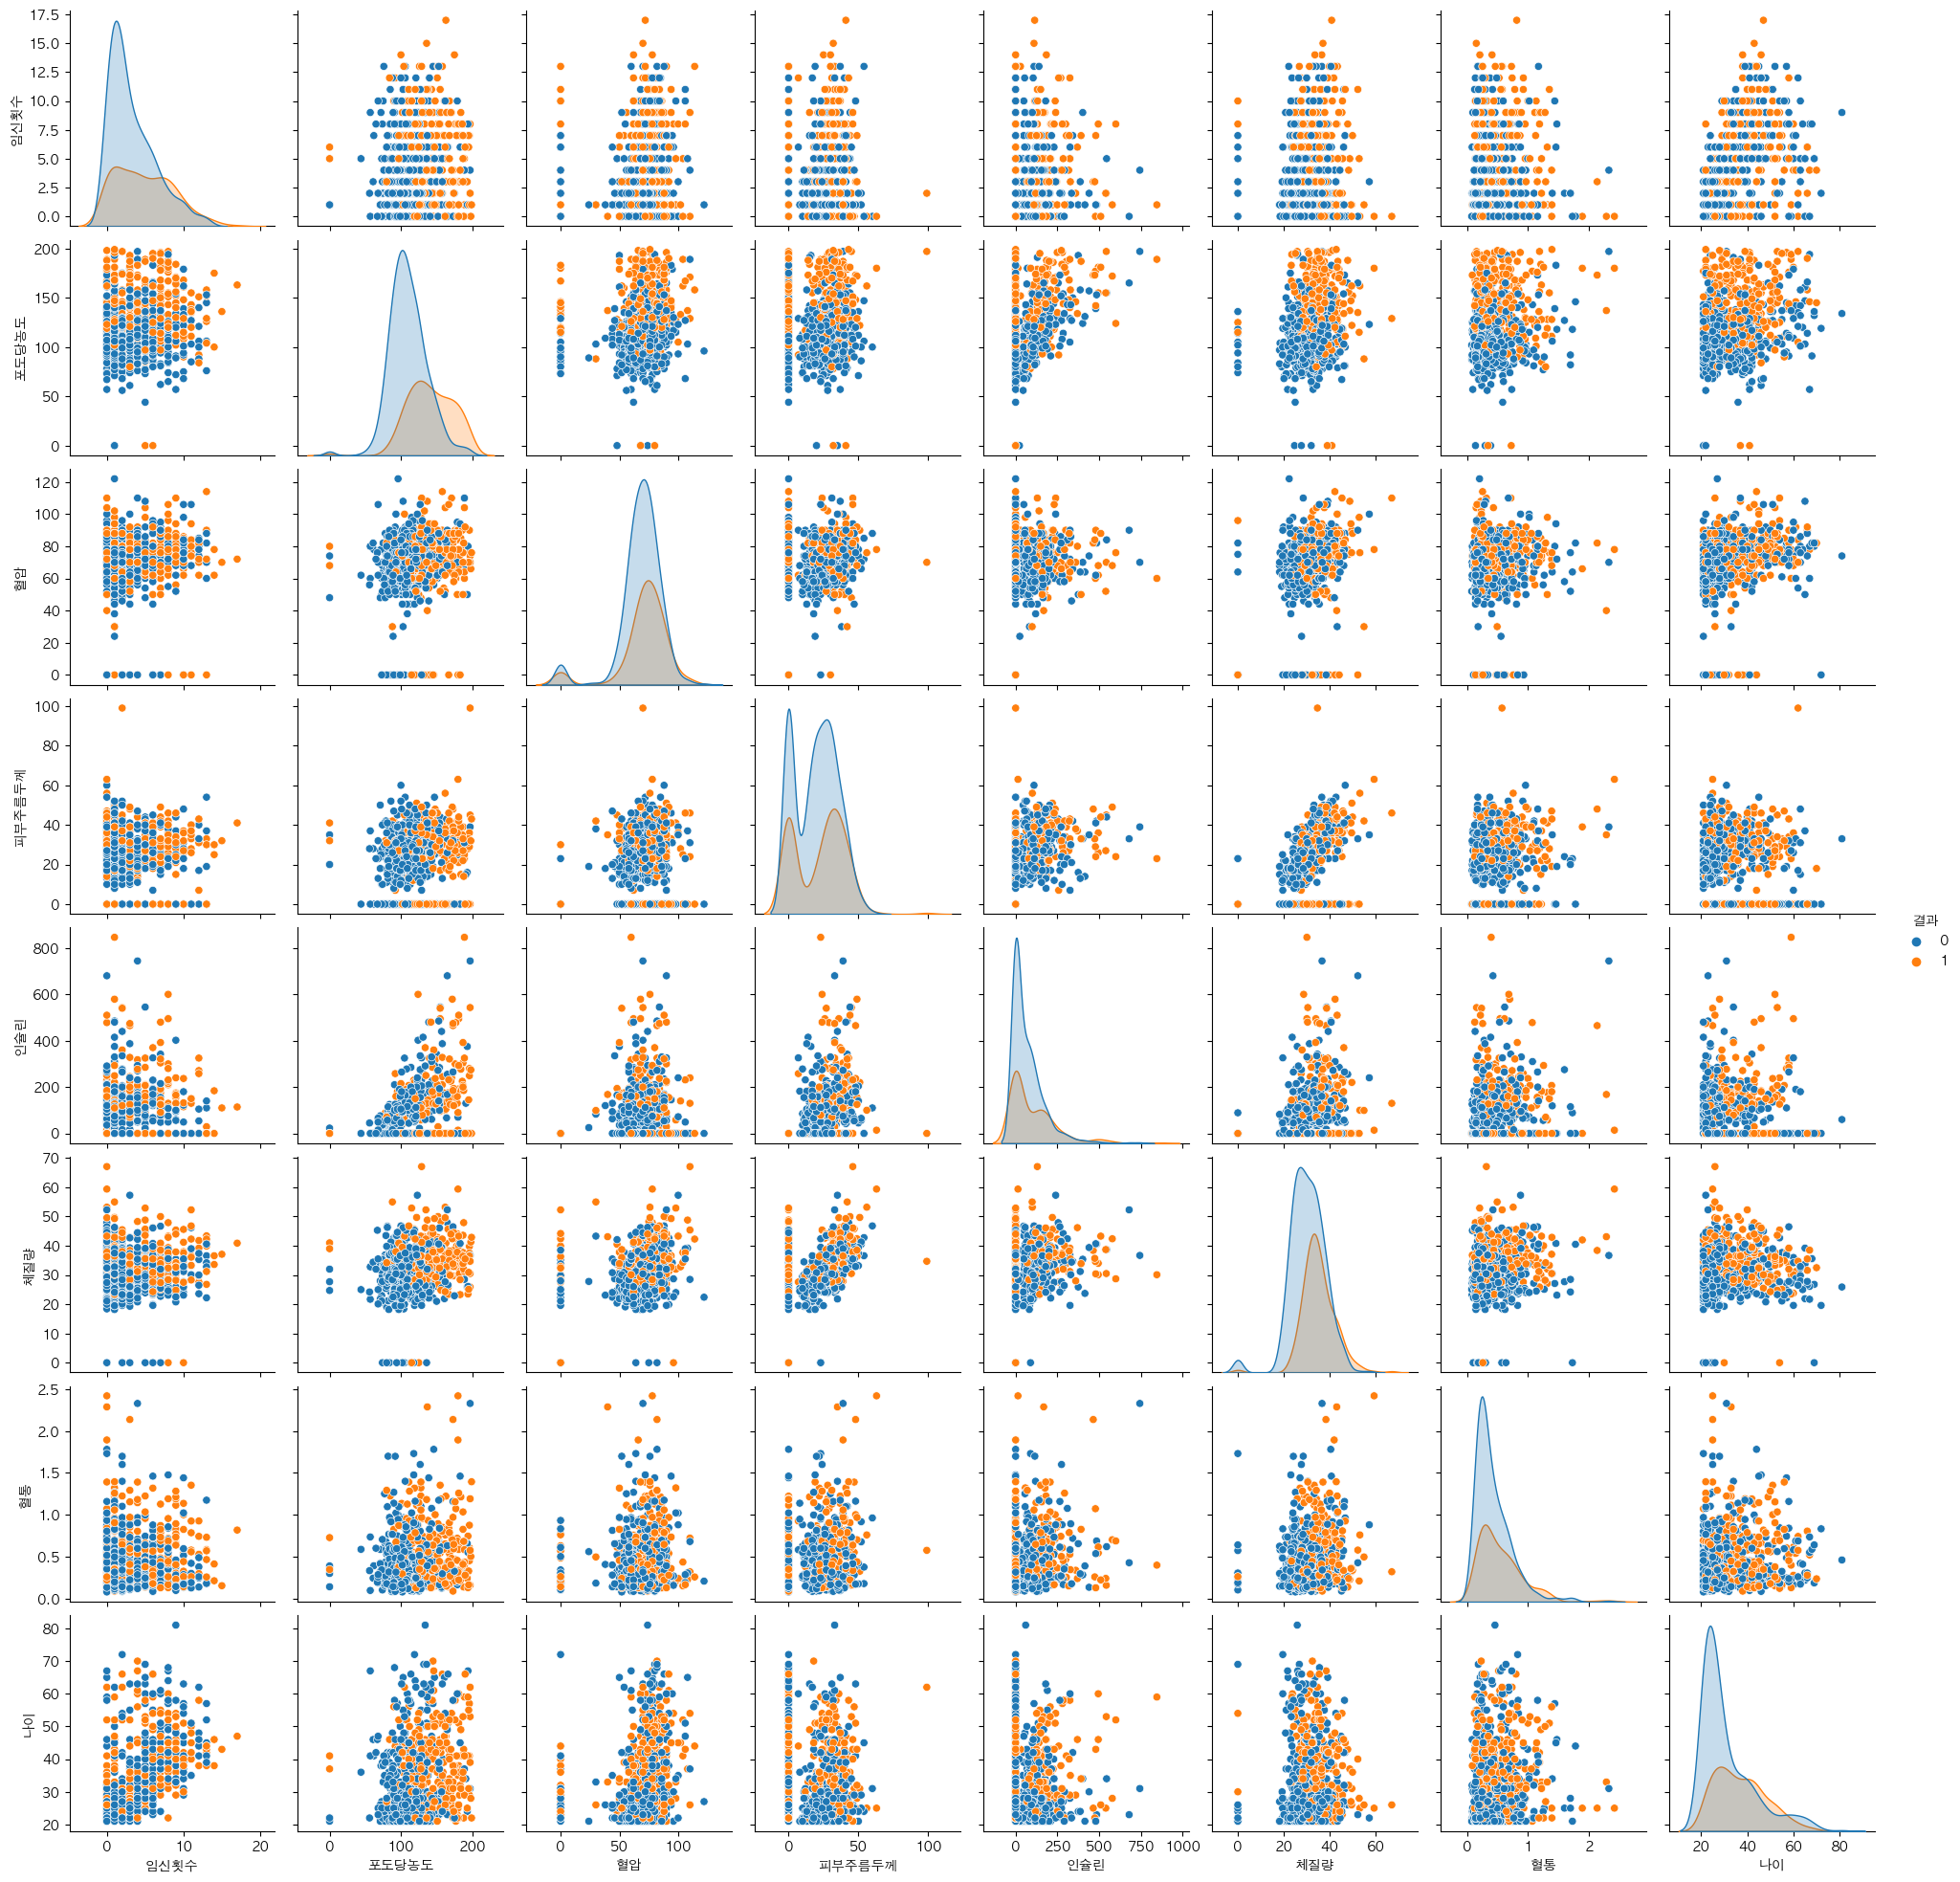

In [13]:
sns.pairplot(df, hue='결과')

In [14]:
df.columns

Index(['임신횟수', '포도당농도', '혈압', '피부주름두께', '인슐린', '체질량', '혈통', '나이', '결과'], dtype='object')

In [15]:
feature = df[['임신횟수', '포도당농도', '혈압', '피부주름두께', '인슐린', '체질량', '혈통', '나이']]
target = np.array(df['결과']).reshape(-1,1)

In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
data = sc.fit_transform(feature)
data

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [17]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(feature, target, test_size=0.2, random_state=42)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [18]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(500, activation='leaky_relu', input_dim=8))
# model.add(Dense(200, activation='leaky_relu'))
model.add(Dense(2, activation='softmax'))

model.summary()

Metal device set to: Apple M1 Pro
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               4500      
                                                                 
 dense_1 (Dense)             (None, 2)                 1002      


2023-09-08 14:19:27.417573: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-09-08 14:19:27.417717: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


                                                                 
Total params: 5,502
Trainable params: 5,502
Non-trainable params: 0
_________________________________________________________________


In [19]:
from keras.optimizers import Adam
from tensorflow import keras

model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history= model.fit(train_input, train_target, epochs=100, validation_data=(val_input, val_target), callbacks=early_stopping_cb)

Epoch 1/100


2023-09-08 14:19:28.068939: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-09-08 14:19:28.362035: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - ETA: 0s - loss: 3.2794 - accuracy: 0.5377

2023-09-08 14:19:29.792187: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 2s 84ms/step - loss: 3.2794 - accuracy: 0.5377 - val_loss: 1.2212 - val_accuracy: 0.6829
Epoch 2/100
16/16 [==============================] - 1s 46ms/step - loss: 1.2077 - accuracy: 0.6334 - val_loss: 1.0654 - val_accuracy: 0.5772
Epoch 3/100
16/16 [==============================] - 1s 61ms/step - loss: 0.8468 - accuracy: 0.6253 - val_loss: 1.0982 - val_accuracy: 0.4878
Epoch 4/100
16/16 [==============================] - 1s 47ms/step - loss: 0.7144 - accuracy: 0.6293 - val_loss: 0.6746 - val_accuracy: 0.6585
Epoch 5/100
16/16 [==============================] - 1s 48ms/step - loss: 0.7131 - accuracy: 0.6599 - val_loss: 0.7309 - val_accuracy: 0.6423
Epoch 6/100
16/16 [==============================] - 1s 48ms/step - loss: 0.7088 - accuracy: 0.6578 - val_loss: 0.7047 - val_accuracy: 0.6098
Epoch 7/100
16/16 [==============================] - 1s 47ms/step - loss: 0.6769 - accuracy: 0.6802 - val_loss: 0.7162 - val_accuracy: 0.6585
Epoch 8/100
16/16 

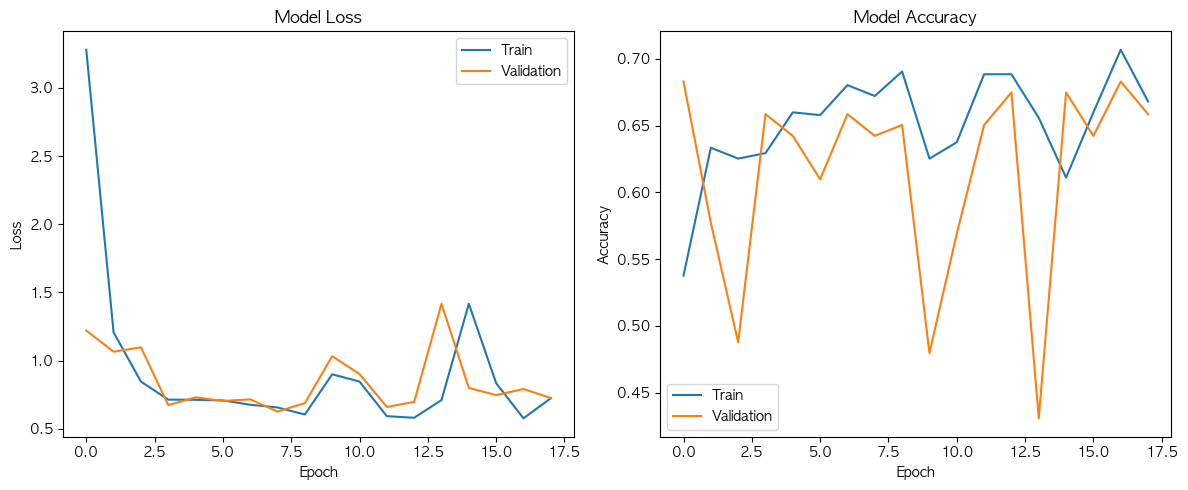

In [20]:
# Loss 그래프
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  # 1x2 플롯의 첫 번째 서브플롯
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

# Accuracy 그래프
plt.subplot(1, 2, 2)  # 1x2 플롯의 두 번째 서브플롯
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.tight_layout()  # 플롯 간의 간격 조절
plt.show()


In [21]:
model.evaluate(train_input, train_target)

16/16 [==============================] - 1s 44ms/step - loss: 0.5366 - accuracy: 0.7312


[0.5365548133850098, 0.7311608791351318]

In [22]:
model.evaluate(val_input, val_target)

4/4 [==============================] - 0s 45ms/step - loss: 0.6269 - accuracy: 0.6423


[0.6268786787986755, 0.642276406288147]

In [23]:
model.evaluate(test_input, test_target)

5/5 [==============================] - 0s 55ms/step - loss: 0.6364 - accuracy: 0.6818


[0.6364120841026306, 0.6818181872367859]

In [24]:
from keras.models import Sequential
from keras.layers import Dense

model2 = Sequential()
model2.add(Dense(500, activation='leaky_relu', input_dim=8))
# model2.add(Dense(200, activation='leaky_relu'))
model2.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               4500      
                                                                 
 dense_1 (Dense)             (None, 2)                 1002      
                                                                 
Total params: 5,502
Trainable params: 5,502
Non-trainable params: 0
_________________________________________________________________


In [25]:
from keras.optimizers import Adam
from tensorflow import keras

model2.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history2 = model2.fit(train_input, train_target, epochs=100, validation_data=(val_input, val_target), callbacks=early_stopping_cb)

Epoch 1/100


2023-09-08 14:19:48.092888: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 2s 84ms/step - loss: 1.3330 - accuracy: 0.5540 - val_loss: 0.7229 - val_accuracy: 0.6667
Epoch 2/100
16/16 [==============================] - 1s 44ms/step - loss: 0.8433 - accuracy: 0.6008 - val_loss: 1.0202 - val_accuracy: 0.6667
Epoch 3/100
16/16 [==============================] - 1s 41ms/step - loss: 0.6470 - accuracy: 0.6660 - val_loss: 0.6868 - val_accuracy: 0.6585
Epoch 4/100
12/16 [=====================>........] - ETA: 0s - loss: 0.6318 - accuracy: 0.6901

2023-09-08 14:19:49.434344: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 1s 52ms/step - loss: 0.6326 - accuracy: 0.6864 - val_loss: 0.8298 - val_accuracy: 0.4797
Epoch 5/100
16/16 [==============================] - 1s 45ms/step - loss: 0.7335 - accuracy: 0.6721 - val_loss: 0.6509 - val_accuracy: 0.6504
Epoch 6/100
16/16 [==============================] - 1s 48ms/step - loss: 0.7324 - accuracy: 0.6456 - val_loss: 0.6613 - val_accuracy: 0.6748
Epoch 7/100
16/16 [==============================] - 1s 51ms/step - loss: 0.6731 - accuracy: 0.6599 - val_loss: 0.6621 - val_accuracy: 0.6423
Epoch 8/100
16/16 [==============================] - 1s 42ms/step - loss: 0.5764 - accuracy: 0.6864 - val_loss: 0.7062 - val_accuracy: 0.6260
Epoch 9/100
16/16 [==============================] - 1s 37ms/step - loss: 0.5825 - accuracy: 0.7026 - val_loss: 0.8326 - val_accuracy: 0.6098
Epoch 10/100
16/16 [==============================] - 1s 43ms/step - loss: 0.6015 - accuracy: 0.6843 - val_loss: 0.6366 - val_accuracy: 0.6423
Epoch 11/100
16/1

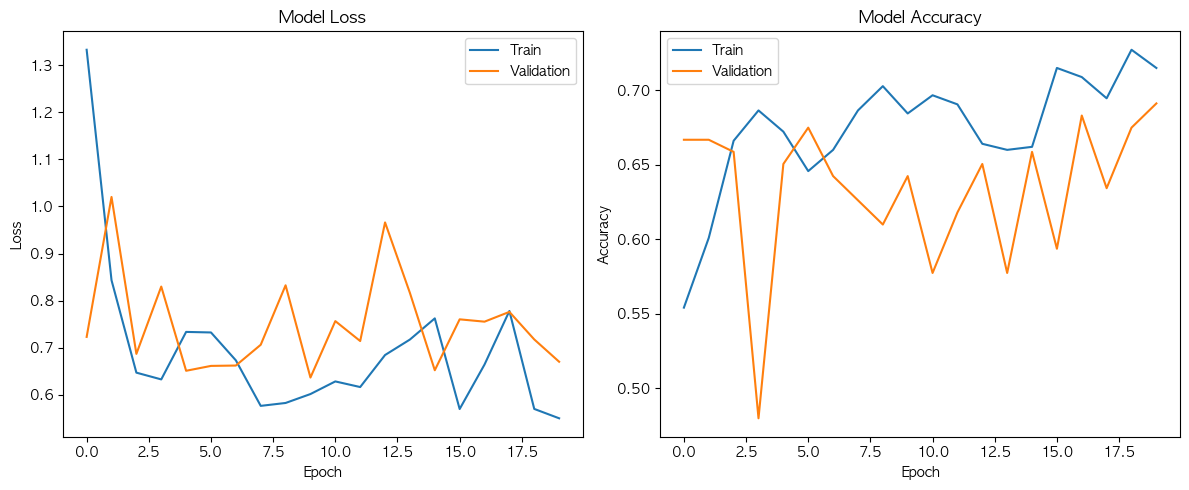

In [26]:
import matplotlib.pyplot as plt

# Loss 그래프
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  # 1x2 플롯의 첫 번째 서브플롯
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

# Accuracy 그래프
plt.subplot(1, 2, 2)  # 1x2 플롯의 두 번째 서브플롯
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.tight_layout()  # 플롯 간의 간격 조절
plt.show()


In [27]:
model2.evaluate(train_input, train_target)

16/16 [==============================] - 1s 32ms/step - loss: 0.5354 - accuracy: 0.7271


[0.5354163646697998, 0.7270875573158264]

In [28]:
model2.evaluate(val_input, val_target)

4/4 [==============================] - 0s 41ms/step - loss: 0.6366 - accuracy: 0.6423


[0.6365689039230347, 0.642276406288147]

In [29]:
model2.evaluate(test_input, test_target)

5/5 [==============================] - 0s 86ms/step - loss: 0.6576 - accuracy: 0.6364


[0.657599925994873, 0.6363636255264282]